## INTRODUCTION AND DESCRIPTION OF FEAUTURES.

* Data Science Job Salaries 

* Dataset Overview
* Data science jobs are some of the fastest-growing, most in-demand in technology. 
* Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

* Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

* Feature Description
* work_year - The year the salary was paid
* experience_level - The experience level in the job during the year with the following possible values:
* EN Entry-level / Junior
* MI Mid-level / Intermediate
* SE Senior-level/ Expert
* EX Executive-level / Director
* employment_type - The type of employement for the role:
  PT Part-time
  FT Full-time
  CT Contract
  FL Freelance
* job_title - The role worked in during the year
* salary - The total gross salary amount paid.
* salary_currency - The currency of the salary paid as an ISO 4217 currency code.
* salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
* employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code
* remote_ratio - The overall amount of work done remotely, possible values are as follows:
  0 No remote work (less than 20%)
  50 Partially remote
  100 Fully remote (more than 80%)
* company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code
* company_size - The average number of people that worked for the company during the year:
  S less than 50 employees (small)
  M 50 to 250 employees (medium)
  L more than 250 employees (large)

 

###  THE GOAL OF THIS NOTEBOOK IS TO ; 
 
 * Explore every feature in the dataset, ranging from;
 
 * Work Year Analysis(with Salary, Remote Ratio)
 * Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)

* Company Location Analysis (with Experience Level)

* Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)

in other to derive meaningfull insight and explore trends from the tech industry and its importance as well.


In [1]:
# importing the necessary libraries for vissualiztion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importaion of data

data =pd.read_csv(r'C:\Users\Sirmiky\Downloads\Data Scientist Salaries - EDA\ds_salaries.csv')
data.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


# DATA INSPECTION AND MANIPULATION;

In [3]:
data.shape

(607, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
# Convert the remote_ratio column values from 0 =No remote work, 50 =Partially remote, 100 =Fully remote
#for smooth EDA
data['remote_ratio'] = data['remote_ratio'].replace([0,50,100], ['No remote','Partially remote','Fully remote'], inplace = True)
data[['remote_ratio']]

,remote_ratio
0,None
1,None
2,None
3,None
4,None
...,...
602,None
603,None
604,None
605,None


In [4]:
# making a proper heading for the experince_level column 

data.experience_level.replace ({'EN':'Entry-Level/Junior','MI':'Mid-level/Intermediate','SE':'Senior-level/Expert','EX':'Executive-level/Director'}, inplace=True)

In [5]:
#  making a proper heading for company_size  column 

data.company_size.replace ({'S':'Small','M': 'Medium', 'L': 'Large'}, inplace=True)

In [13]:
# making a proper heading for employement_type  column 

data.employment_type.replace({'PT':'Part_time', 'FT': 'Full_time', 'CT': 'Contract', 'FL' :'Freelance'}, inplace =True)

In [6]:
data.remote_ratio.replace({0:'No remote', 50:'Patially remote', 100:'Fully remote'}, inplace = True)

In [7]:
# dropping the unnamed column because it is not usefull for the analysis

data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,FT,Data Scientist,70000,EUR,79833,DE,None,DE,Large
1,2020,Senior-level/Expert,FT,Machine Learning Scientist,260000,USD,260000,JP,None,JP,Small
2,2020,Senior-level/Expert,FT,Big Data Engineer,85000,GBP,109024,GB,None,GB,Medium
3,2020,Mid-level/Intermediate,FT,Product Data Analyst,20000,USD,20000,HN,None,HN,Small
4,2020,Senior-level/Expert,FT,Machine Learning Engineer,150000,USD,150000,US,None,US,Large


In [10]:
#checking for unique items in 'job_title' colunmn

col_job_title = data['job_title'].value_counts().to_frame()
col_job_title

,job_title
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8
Principal Data Scientist,7


In [10]:
# generating statistics for non numeric data

data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,607,607,607,607,607,0,607,607
unique,4,4,50,17,57,0,50,3
top,Senior-level/Expert,FT,Data Scientist,USD,US,NaN,US,Medium
freq,280,588,143,398,332,NaN,355,326


# Summary of Findings from the dataset

* The Dataset contains 607 rows and 12 columns.
* There are no missing values in the dataset.
* Unnamed column is not useful for analysis ( column is Dropped).
* Data contains values from 2020 to 2022 Work Year
* There are 4 unique experience levels in the dataset
* The Dataset contains 4 employment types; FT (Full time employment) is the most common type occurring 588 instances).
* There are 50 unique job titles with data scientist taking the lead with 143.
* Salary is recorded in 17 different currencies with USD toping the chart.
* The average salary in USD is 112,297.87
* Employees are resident in 57 locations while the Companies are located in 50 locations.
* The US contains the most Data Science professionals and companies with 332 professionals and 355 companies resident in the US.

# UNIVARIATE ANALYSIS

## Please note; below every vissualization there is a summary findings  that follows.

### Experience level anaysis

<function matplotlib.pyplot.show(close=None, block=None)>

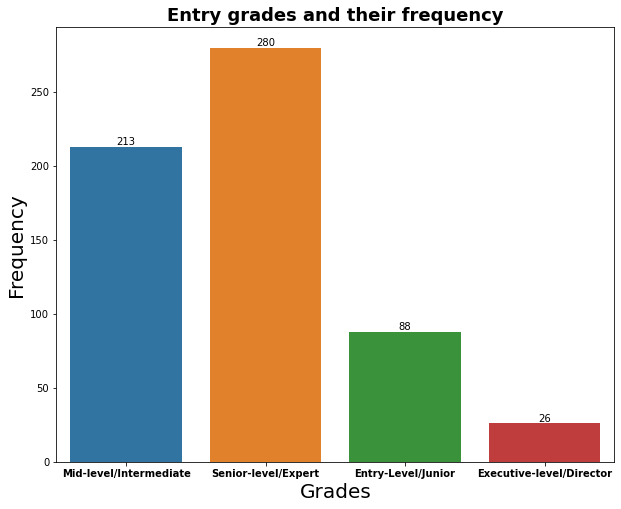

In [12]:
#A vissualization showing the level of experience of workers invlove.

plt.figure(figsize=(10,8))
plt.title('Entry grades and their frequency', fontsize=18, fontweight='bold')
ax = sns.countplot (x='experience_level', data=data)
plt.xlabel('Grades',fontsize =20)
plt.xticks(fontweight='bold')
plt.ylabel('Frequency',fontsize =20)
for i in ax.containers:
    ax.bar_label(i)
plt.show

The vissualiztion above shows the  experience level of entry and the respective numbers of persons involves:

* The senior or expert level are the highest group of persons who where engaed, with a total number of 288 persons.
* Mid or intermediate level persons followed with the total number of 213 persons.
* The next category where the Entry or Junior level persons with 88 persons
* And lastly is the Executive or Director level with just 26 persons

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

* In other words, Senoir/Expert level professionals took about 46.1%, Midiates/intermediate level professionals has 35.1% while 
Entry/Junior level professionals occupied 14.5% and lastly Executive/Director level has the least with 4.3% of the total  categories of professionals who where engaged.

Text(0.5, 1.0, 'Experience Level Distribution')

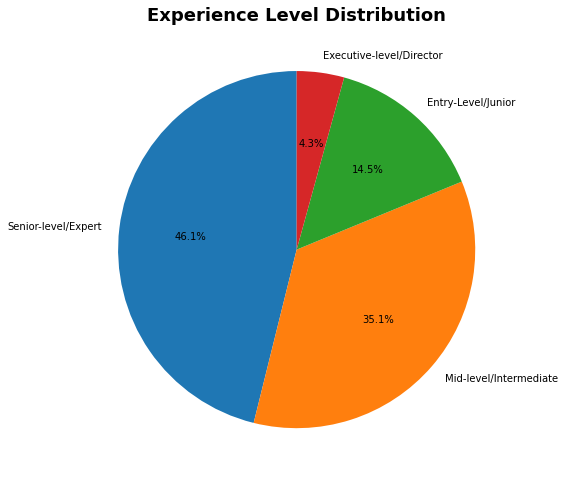

In [14]:
# A vissualization showing the level of experience of workers invlove in percentage.
           
data.experience_level.value_counts()


ax = plt.subplots(figsize=(8,12))
labels = ['Senior-level/Expert', 'Mid-level/Intermediate', 'Entry-Level/Junior', 'Executive-level/Director']
sizes = [280, 213, 88, 26]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
wedgeprops={'linewildth':2.0, 'edgecolors': 'white'}
plt.title('Experience Level Distribution',fontsize=18,fontweight='bold')


# Job title analysis

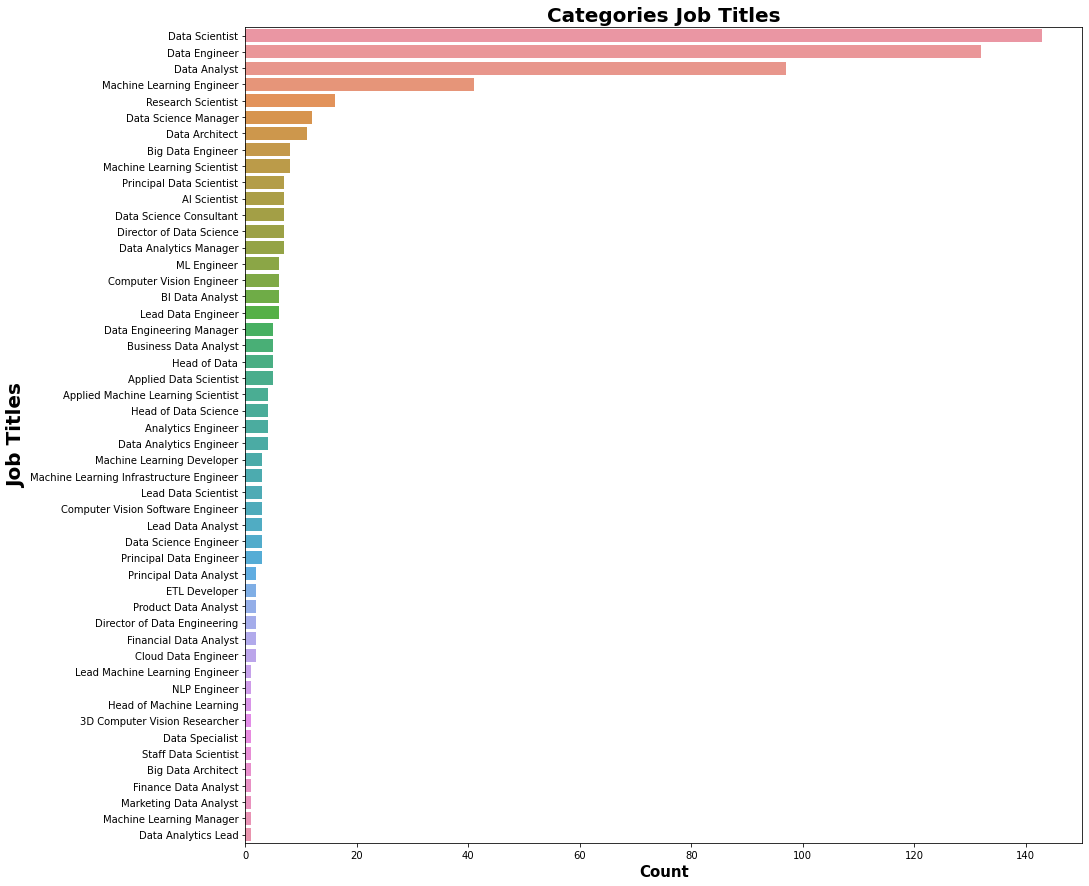

In [22]:
# A vissualization to show the titles of job


plt.figure(figsize=(15,15))
plt.title('Categories Job Titles', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=data, order=data['job_title'].value_counts().index )
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')

(-0.5, 2999.5, 1999.5, -0.5)

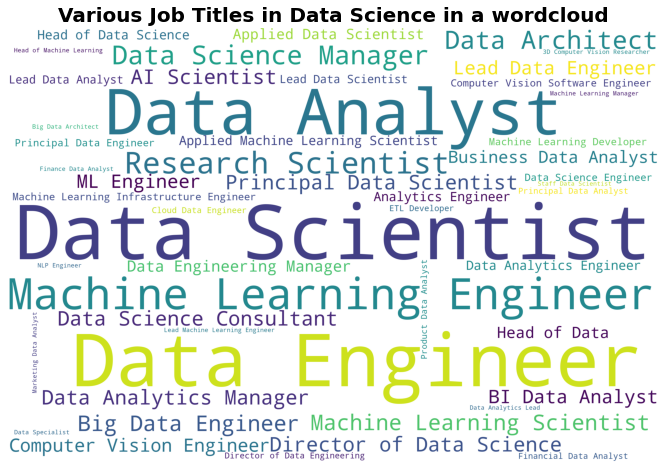

In [15]:
from wordcloud import WordCloud, STOPWORDS

#Create text variable
from collections import Counter
word_cloud_list=Counter(data.job_title)

#Generate Word Cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    #random_state=1,
    background_color="white",
    #colormap="Set2",
    collocations= False,
    stopwords=STOPWORDS,
).generate_from_frequencies(word_cloud_list)

# Display the generated word cloud
plt.figure(figsize=(15,8))
plt.title('Various Job Titles in Data Science in a wordcloud', fontsize=20, fontweight='bold')
plt.imshow(wordcloud)
plt.axis("off")

## There are top four job titles taking leads as arrange in ascending order they includes Data scientists, Data engineer,Data analysts and  Machine learning engineer. other jobs titles has less than twenty persons who where engaged in the data set.

# Employment type analysis

In [25]:
# count of employment types

data.employment_type.value_counts()

Full_time    588
Part_time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

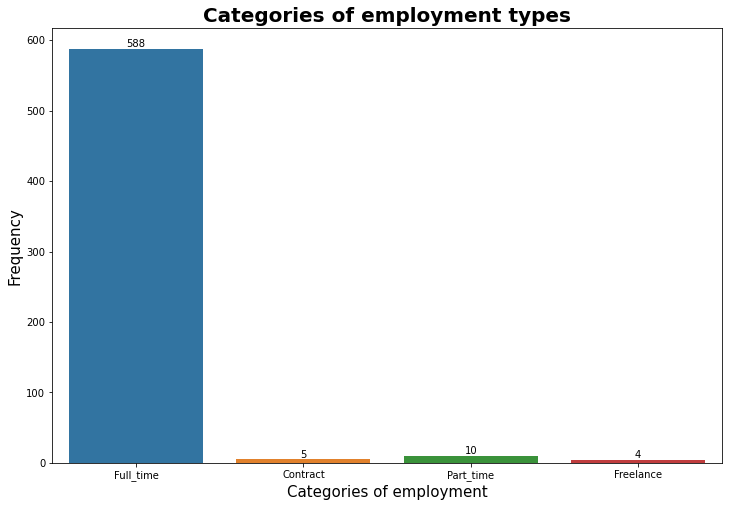

In [26]:
# vissualizaton to show the categories of employment

plt.figure(figsize=(12,8))
plt.title('Categories of employment types', fontsize = 20, fontweight = 'bold')
ax = sns.countplot(x = 'employment_type', data= data)
for j in ax.containers:
    ax.bar_label(j)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Categories of employment', fontsize = 15)
plt.show()


In [27]:
# categories of employement in percentages

employ_type_ratio = (data['employment_type'].value_counts()/data.shape[0]*100).round()
employ_type_ratio

Full_time    97.0
Part_time     2.0
Contract      1.0
Freelance     1.0
Name: employment_type, dtype: float64

## Those who where employed on a full time bases are 588 persons and this occupies about 97% of the employent type categories, part time employees are 10 persons, contracts employess has a total number of just 5 persons and Freelanceers has the least number of persons with just 4. This remaining three categories comprises just 4% of the total numbers of employment type. 

# Employee residence and company location analysis

In [82]:
# counts of employee resident

data.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [28]:
# counts of company locations

data.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

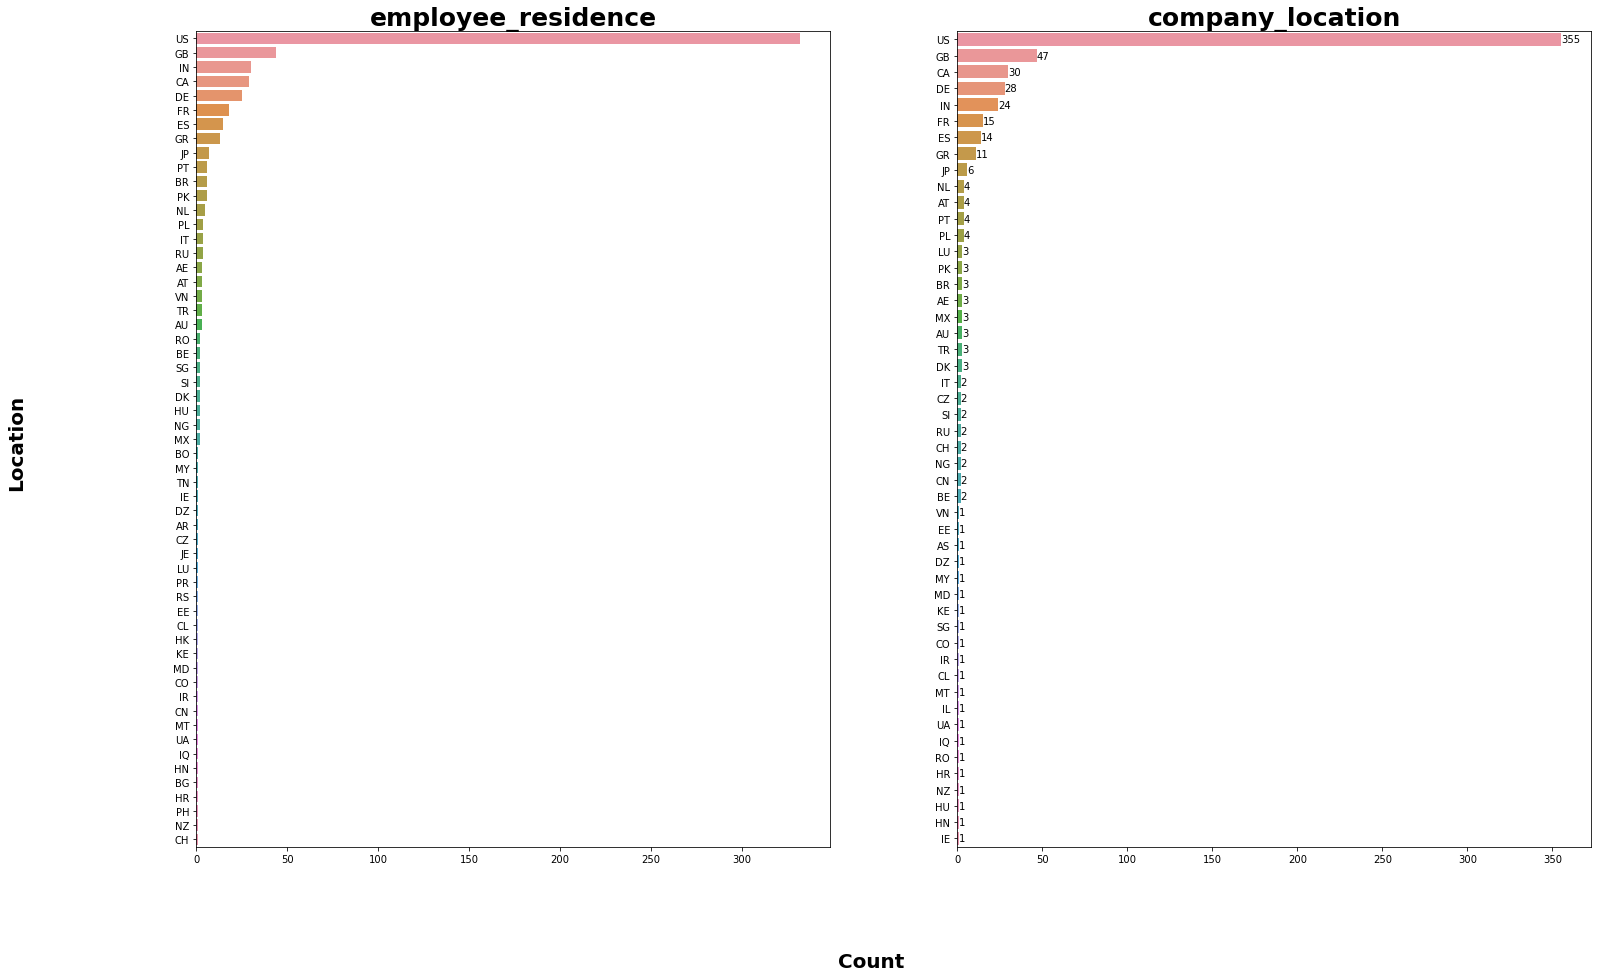

In [29]:
#vissualizing the relation between employee residence and company location
fig, axes = plt.subplots(1,2,figsize=(25,15))
ax = sns.countplot(ax=axes[0],y ='employee_residence', data = data, order = data['employee_residence'].value_counts().index)
ax = sns.countplot(ax=axes[1],y ='company_location', data = data, order = data['company_location'].value_counts().index)

for i in ax.containers: 
    ax.bar_label(i)
    
axes[0].set_title('employee_residence', fontsize = 25, fontweight ='bold')
axes[0].set (xlabel= None)
axes[0].set (ylabel= None)
axes[1].set_title('company_location', fontsize = 25,fontweight = 'bold')
axes[1].set (ylabel = None)
axes[1].set (xlabel = None)


fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()



### About 332 of the employee resides in the US, while a total of 47 persons resides in Great Britain, India has 30 persons,  Canada has 29, Denmark 25, France 18, Estonia 15, Germany has 13 persons. while the rest countrieshas less than 10 persons.

## ---------------------------------------------------------------------------------------------------------------------------------
### Majority of the companies are located in the United states, about  355 in US, Great Britain has 47, Canada has 30, Denmark has 28, India has 24, France has 15, Estonia 14 and Germany with 11 companies. the rest countries has less than 10 companies in the data set.

#  company size analysis

In [30]:
#checking the unique values in the company_size column

data.company_size.value_counts()

Medium    326
Large     198
Small      83
Name: company_size, dtype: int64

Text(0.5, 1.0, 'category of company and size')

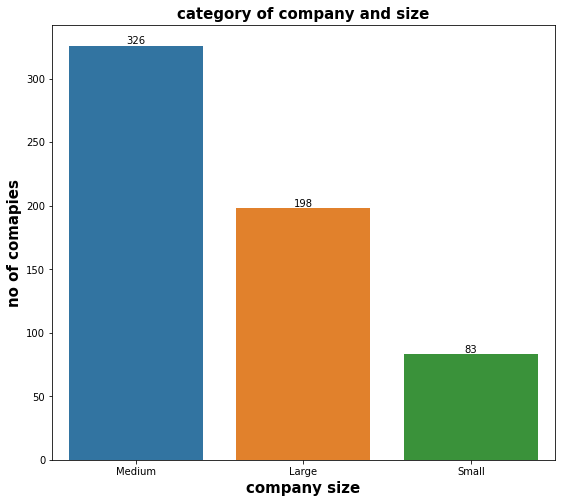

In [31]:
#vissualization showing the categories of company and their sizes

plt.figure(figsize=(9,8))
ax = sns.countplot(data=data,x = 'company_size', order = data['company_size'].value_counts().index)
for j in ax.containers:
    ax.bar_label(j)
plt.xlabel('company size', fontsize = 15, fontweight = 'bold')
plt.ylabel('no of comapies', fontsize = 15, fontweight='bold')
plt.title('category of company and size', fontsize = 15, fontweight = 'bold')

### Medium sizes companies  has the highest numbers of companies, followed by Large and the Small groups of companies is the list in the data set.

# work year analysis

In [32]:
# count of work year

data.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

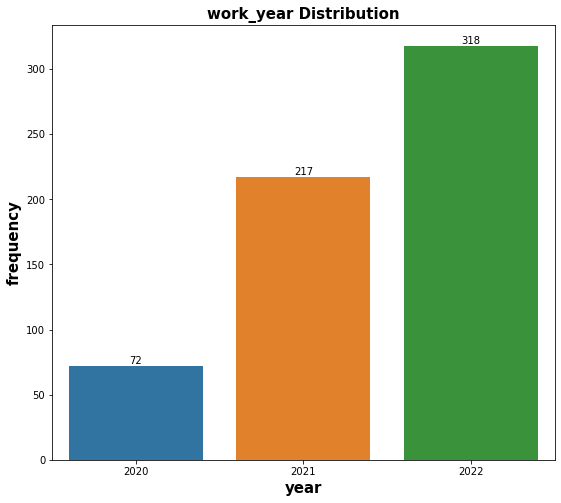

In [103]:
# a vissualisation showing the work year analysis

plt.figure(figsize =(9,8))
plt.title('work_year Distribution', fontsize = 15, fontweight = 'bold')
ax = sns.countplot(x='work_year', data= data)
for j in ax.containers:
    ax.bar_label(j)
plt.xlabel('year', fontsize = 15, fontweight = 'bold')
plt.ylabel('frequency', fontsize = 15, fontweight = 'bold')
plt.show()

### IN 2020 less people where engaged in data science jobs its grew in 2021 and rise more in 2022; this shows further the rising trend and demand for data science professionals.

# salary in usd analysis

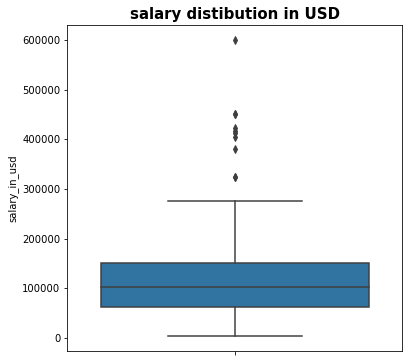

In [109]:
# vissualization showing salary in USD in a boxplot

plt.figure(figsize =(6,6))
plt.title('salary distibution in USD', fontsize = 15, fontweight='bold')
sns.boxplot(data = data, y='salary_in_usd')
plt.show()

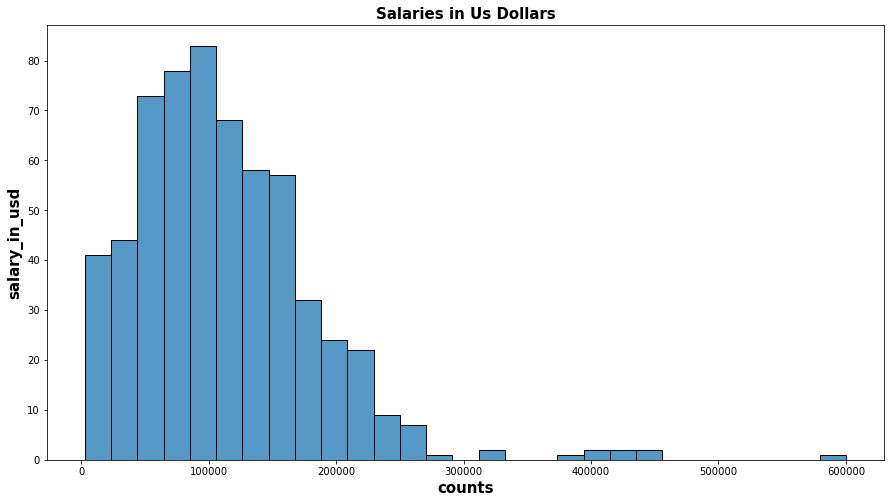

In [14]:
# vissualization showing salary in USDin a histograme

plt.figure(figsize=(15,8))
sns.histplot(data=data, x='salary_in_usd')
plt.xlabel('counts', fontsize=15, fontweight='bold')
plt.ylabel('salary_in_usd', fontsize=15, fontweight='bold')
plt.title('Salaries in Us Dollars', fontsize=15, fontweight = 'bold')
plt.show()

In [110]:
# counts of salary in usd

data.salary_in_usd.value_counts()

100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64

###  The average salary of  data science professional is about a hundred thousand USD. secondly most of the data science professionals earn between fifty thousand to two hundred thousand USD, their are outliers in their range as well, this could be the high salary figure earned by those in the senior/expert level and the  executive/director level.

# Remote Ratio analysis

In [10]:
# count of remote ratio

data.remote_ratio.value_counts()

Fully remote       381
No remote          127
Patially remote     99
Name: remote_ratio, dtype: int64

Text(0, 0.5, 'Frequency')

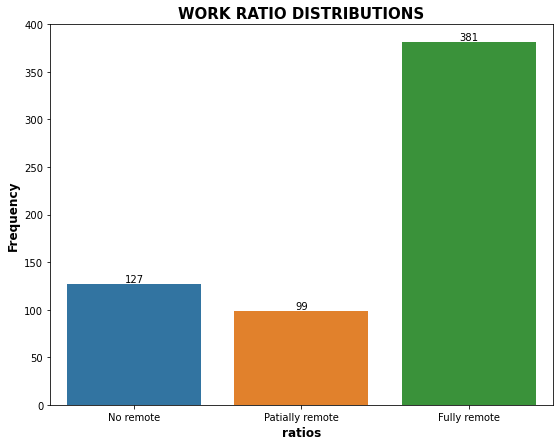

In [11]:
# vissualization showing remote ratio work distribution

plt.figure(figsize =(6,6))
plt.title('salary distibution in USD', fontsize = 15, fontweight='bold')
sns.boxplot(data = data, y='salary_in_usd')
plt.show()

plt.figure(figsize=(9,7))
ax = sns.countplot(x = 'remote_ratio', data = data)
for j in ax.containers:
    ax.bar_label(j)
plt.title('WORK RATIO DISTRIBUTIONS', fontsize = 15, fontweight = 'bold')
plt.xlabel('ratios', fontsize = 12, fontweight='bold')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold')

<function matplotlib.pyplot.show(close=None, block=None)>

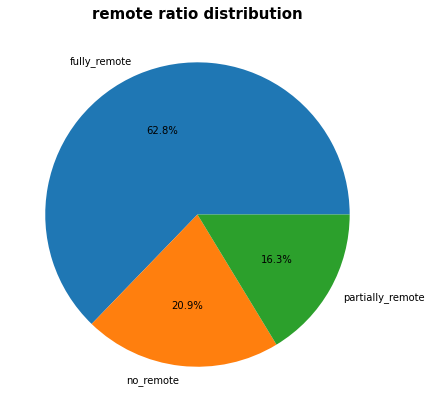

In [12]:
 # vissualization showing remote ratio work distribution in percentage



plt.figure(figsize=(8,7))
labels = ['fully_remote', 'no_remote', 'partially_remote']
size = [381,127,99]

plt.pie(size, labels = labels, autopct ='%1.1f%%')
plt.title('remote ratio distribution', fontsize = 15, fontweight='bold')
plt.show

### About 63% of the data science professionals where engaed on a fully remote basis, 16% where engaed on a patially remote system. while about 21% where on no remote at all, that is on a  full time basis.

# remote ratio by work year

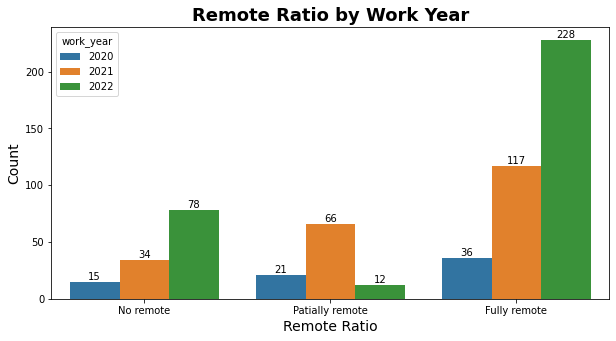

In [16]:
# vissualization showing remote ratio by work year

plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18,fontweight = 'bold')
ax = sns.countplot(x='remote_ratio', data=data, hue = 'work_y')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

### For the no remote ratio, that is those who were employed on a full time basis;  2020 has about 15 persons, its then rises to 34 persons in 2021, then to 78 in 2022.

### For the Patially remote employees, in 2020 its has about 21 persons, 66 in 2021 then droped to 12 persons in 2022.

### And lastly for the Fully remote employed persons, 2020 has about 36 numbers of persons who were working fully remotely, 2021 its increased to 117 persons and rise rapidly to about 228 persons in 2022. 

### Employment Type by Experience Level

In [32]:
# a crosstab showing employment type by experience level
type_level_pivot = pd.crosstab(data['employment_type'],data['experience_level'])
type_level_pivot


experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
employment_type,,,,
Contract,2,1,1,1
Freelance,0,0,3,1
Full_time,79,25,206,278
Part_time,7,0,3,0


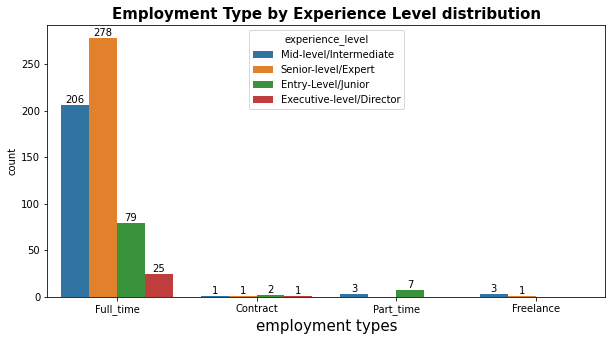

In [33]:
# vissualization showing employment type by experience level

plt.figure(figsize=(10,5))
plt.title('Employment Type by Experience Level distribution', fontsize = 15, fontweight = 'bold')
ax = sns.countplot(x = 'employment_type', data = data, hue = 'experience_level')
for j in ax.containers:
    ax.bar_label(j)
plt.xlabel('employment types', fontsize=15)
plt.show()

### The full time employees has the highest numbers of data science professionals who were engaged in all categories of experience level; here comes their breakdown, for Senior or expert level categories it has 278 employees, for mid or intermediate level it has 206 employees, for Entry or Junior level it has 79 employees and the least is the Executive or Director level with just 25 employees.

### The part time employees follows, with this breakdown; Entry or Ju nior level has 7 employees, Mid or intermediate level has 3 employees, then Senior or Expert level and the Executive or Director level has zero employees under the part time employment type.

### For the contract employees, Entry or Junior level has 2 staffs while the other remaining categories has one employee each.

### And for the Freelance workers Mid or intermediate level experience has  3 employees, for Senior or Executive  experience worker is one, while the other experience level categories has zero workers.

# What are the top three job titles by Experience level.

In [88]:
# counts of job title

data.job_title.value_counts()[:3]

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

Text(0.5, 0, 'job titles')

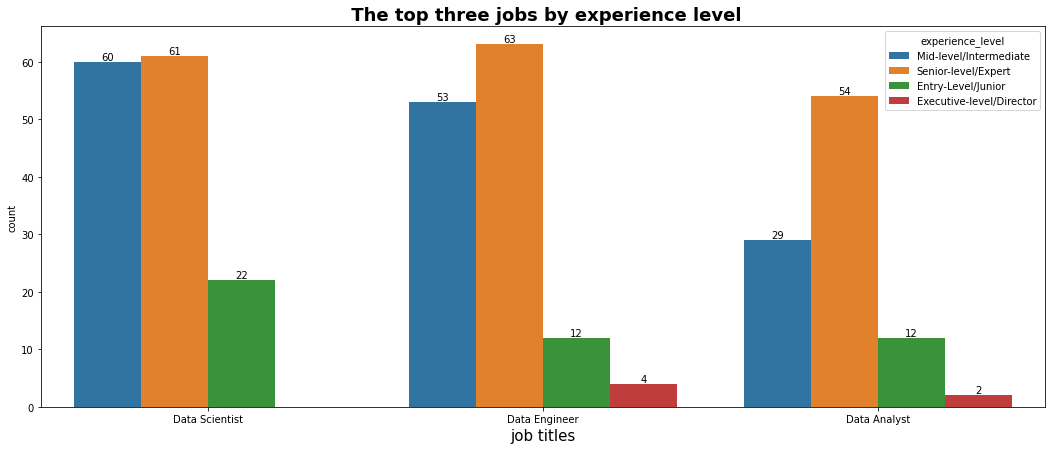

In [111]:
# vissualization showing job title distribution


plt.figure(figsize=(18,7))
ax = sns.countplot(x= 'job_title', data = data, hue = 'experience_level', order = data['job_title']
                   .value_counts().iloc[:3].index)
for j in ax.containers:
    ax.bar_label(j)
plt.title(' The top three jobs by experience level', fontsize=18, fontweight='bold')
plt.xlabel('job titles', fontsize=15)

### The top three job titles by experience level are Data Scientists, Data Engineer and Data Analysts; Data Scientist has 61 Senior or Expert level experienced employees, 60 Mid or intermidiates level and 22 Entry or Junior level entry employees. making it a total of 143 staffs under  Data science. 

### Then Data Engineer has 63 alocated to Senior or Expert level staffs, 53 personnel to Mid or intermidiates level employees, 12 to Entry or Junior level and 4 to Executive or Director level employees. making it a total of 132 under Data Engineer employees.

### while Data Analysts has about 54 to Senior or expert level, 29 to Mid or intermidiates level, 12 to Entry or Junior level and lastly 2 to Executive or Director level employees. making a total of about 97 employees for Data Analysts employees.

# Company Size by Experience level analysis

In [48]:
# a crosstab showing companiy size by experience level

company_experience_level_pivot = pd.crosstab(data['company_size'], data['experience_level'])
company_experience_level_pivot

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
company_size,,,,
Large,29,11,86,72
Medium,30,12,98,186
Small,29,3,29,22


Text(0.5, 1.0, 'Distribution of company size by experience level')

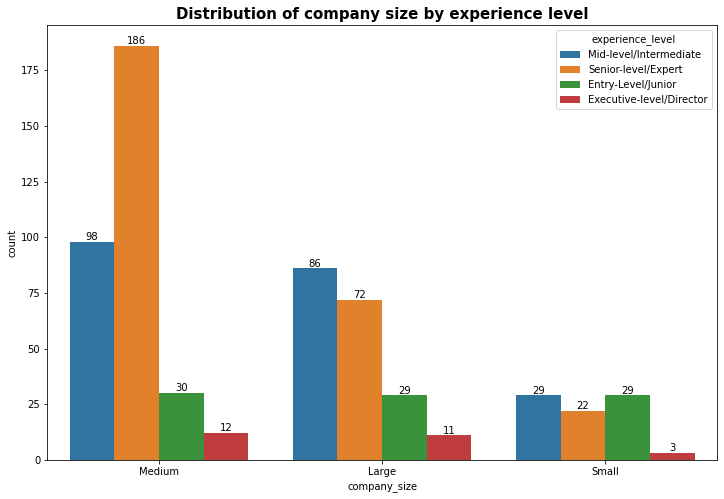

In [46]:
# vissualization showing company size by experience level distribution


plt.figure(figsize=(12,8))
ax=sns.countplot(x = 'company_size',hue = 'experience_level', data = data, order=data['company_size'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Distribution of company size by experience level', fontsize = 15, fontweight='bold')


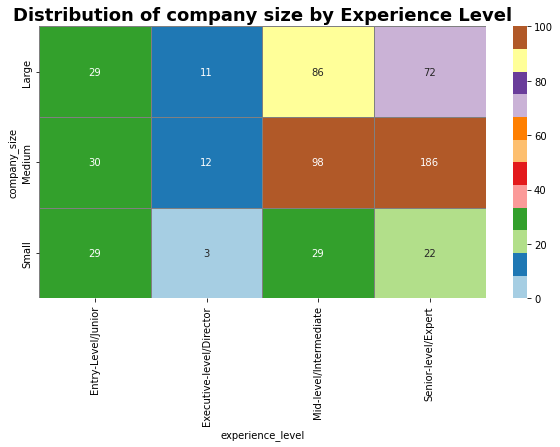

In [17]:
# A vissualization showing t the company size by experience level

ct2 = pd.crosstab(data['company_size'], data['experience_level'])
plt.figure(figsize=(10,5))
sns.heatmap(ct2, cmap='Paired', annot=True, fmt='d', vmin=0, vmax=100,linewidths=.5, linecolor='gray')
plt.title('Distribution of company size by Experience Level', fontsize=18,fontweight='bold')
plt.show()

### The breakdown of company sizes and the numbers of employees by experienced levels are; 

### The Medium size takes the lead with about 186 employees from Senior or Expert level experienced, 98 from Mid or Intermediate level, 30 from Entry or Junior level and the least  is Executive or Director level with 12 employees.

### The large size company follows with 86 from Mid or intermidiate level experienced employees, 72 from Senior or expert level, 29 from Entry or Junior level and 11 from Executive or Director level.

### Small size company comes last with about 29 employees from Entry or Junior level, 29 also from Mid or intermidiate level, 22 from Senior or Expert level and 3 employees from the Executive or Director level experinced category.

## Company Location Analysis

In [61]:
# counts of company location 

data.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

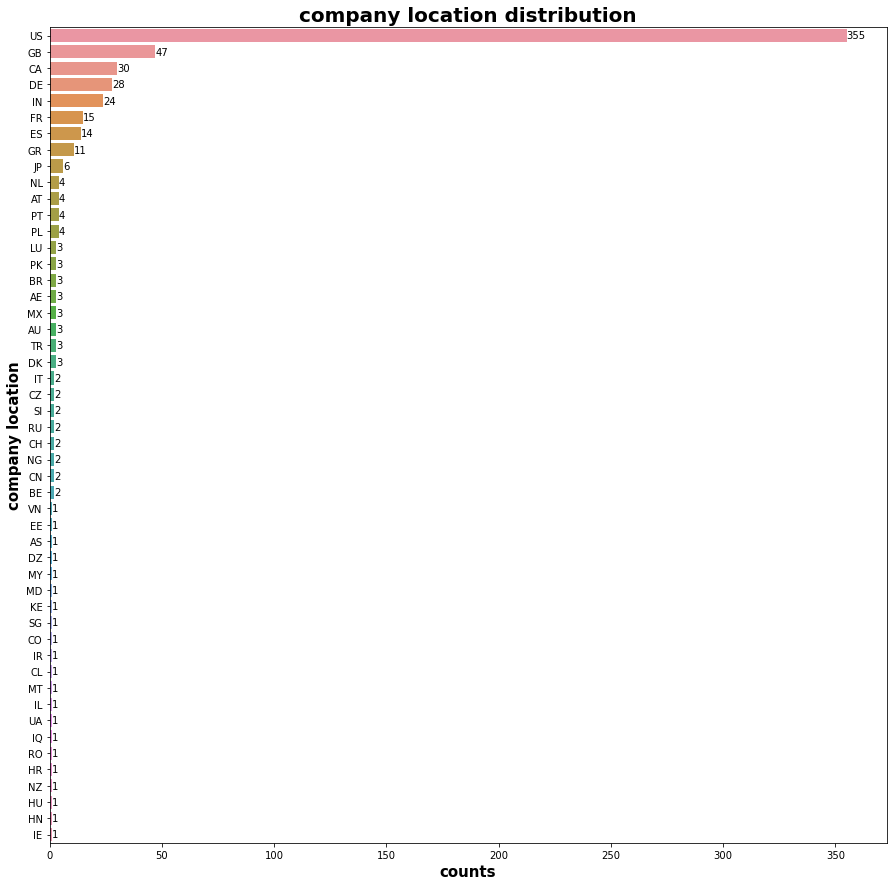

In [69]:
#  vissualization showing company location distribution


plt.figure(figsize =(15,15))
plt.title('company location distribution', fontsize = 20, fontweight='bold')
ax = sns.countplot(y='company_location', data= data, order=data['company_location'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('counts', fontsize=15, fontweight='bold')
plt.ylabel('company location', fontsize=15, fontweight='bold')
plt.show()

# Experience level analysis

In [12]:
# counts of experience_level 

data. experience_level.value_counts()

Senior-level/Expert         280
Mid-level/Intermediate      213
Entry-Level/Junior           88
Executive-level/Director     26
Name: experience_level, dtype: int64

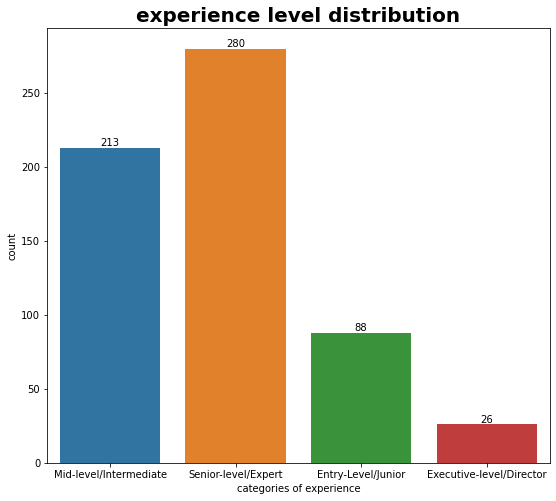

In [71]:
#A vissualization showing experience level

plt.figure(figsize =(9,8))
plt.title('experience level distribution', fontsize = 20, fontweight='bold')
ax = sns.countplot(x='experience_level', data= data)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('categories of experience')
plt.show()

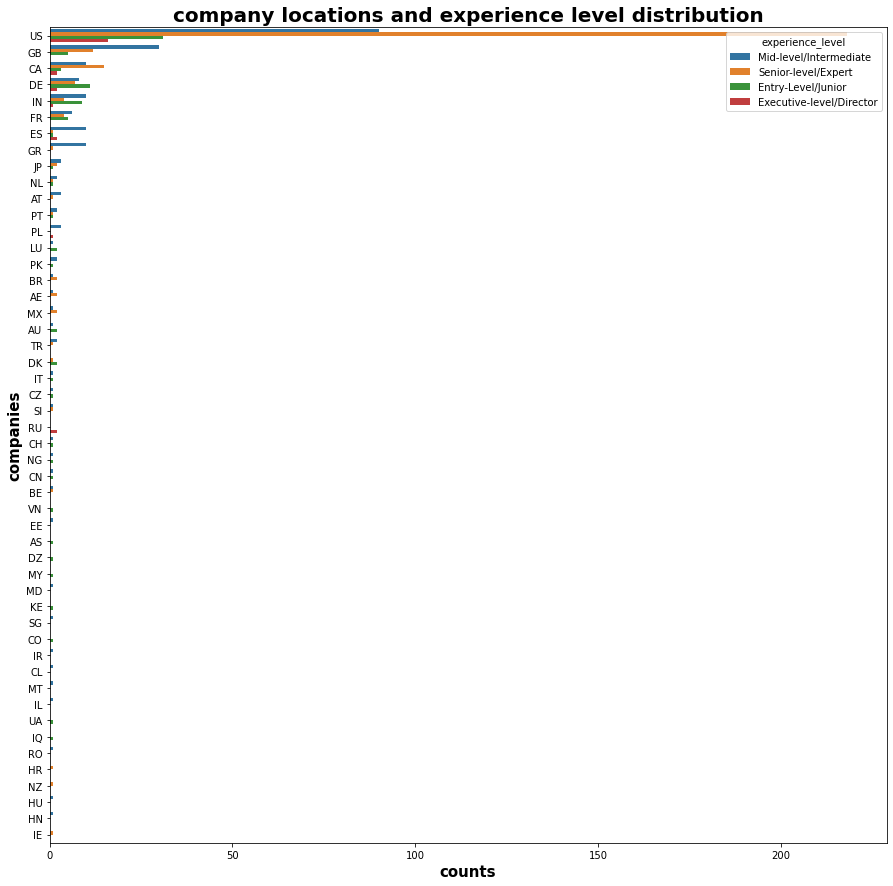

In [72]:
#  vissualization showing company location and experience level distribution

plt.figure(figsize =(15,15))
plt.title('company locations and experience level distribution', fontsize = 20, fontweight='bold')
sns.countplot(y='company_location',hue = 'experience_level', data= data, order=data['company_location'].value_counts().index)
plt.ylabel('companies',fontsize=15,fontweight='bold')
plt.xlabel('counts',fontsize=15,fontweight='bold')
plt.show()

### Majority of the companies are located in the United states, about 355 of them, Great Britain has 47, Canada has 30, Denmark has 28, India has 24, France has 15, Estonia 14 and Germany with 11 companies. the rest countries has less than 10 companies in the data set. The companies in the US engaged mostly the services of Senior or expert level experienced personnel, followed by Mid or intermidiate level, Entry or Junior level and the least which is the Executive or Director level experience employees.

### Great Britain takes the second highest number in the terms of company location; The employees involved in terms of experience level are; Mid or intermidiate level followed by Senior or expert level, then the least is Entry or Junior level  experience employees , they have no Executive or Director level.

### Canada is the third country with another reasonable number of company location with senior or expert level experience employees as the highest number, followed by mid or intermidiate level and the Entry or junior level then Executive or Director level making a mark as well.

### Denmark came fourth in terms of company location with the following numbers of experience level employees; Entry or Junior level, Mid or intermidiate level, Senior or expert level, then the Executive or Director level respectively.

### The fifth is Italy, the breakdown for the numer of experience level employees is; mid or intermidiate level, Entry or Junior level, senior or expert level is the least among them.

# Salary by work year Analysis

In [112]:
# counts of salary in usd by work year 

data.salary_in_usd.value_counts()

100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64

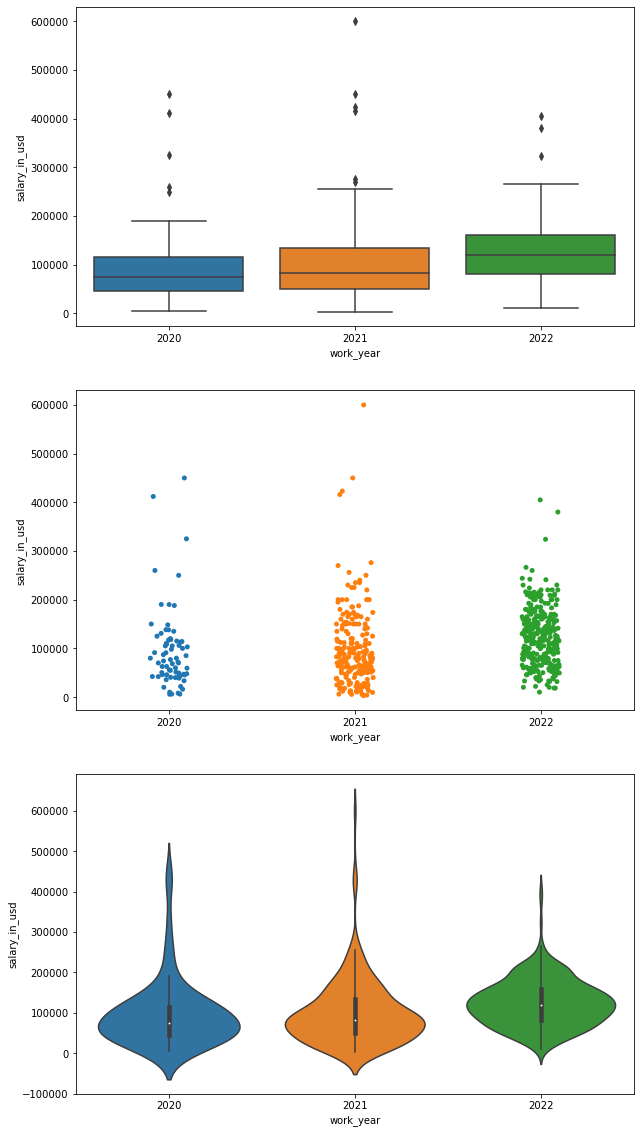

In [111]:
#  vissualizations showing salary in usd by work year distribution


fig,axes =plt.subplots(3,figsize=(10,20))
sns.boxplot(ax = axes[0],x = 'work_year', y = 'salary_in_usd', data = data)
sns.stripplot(ax = axes[1],x = 'work_year', y = 'salary_in_usd', data = data)
sns.violinplot(ax = axes[2],x = 'work_year', y = 'salary_in_usd', data = data)
plt.show()


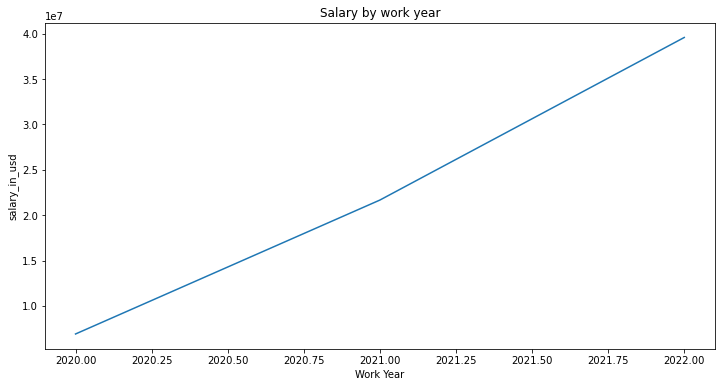

In [107]:
# a line plot showing trend of salary in usd by work year distribution

salary_work_yr = data.groupby('work_year').summ()['salary_in_usd'].reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data = salary_work_yr, x = 'work_year', y = 'salary_in_usd')
plt.xlabel('Work Year')
plt.title('Salary by work year')
plt.show()


### There is a steady increase in the salary earned by the data science pfrofessionals from 2020 to 2022, and the average salary of a data science professional is about 100,000 usd. 

### The salaries rises from 100,000 usd to 120,000 usd then to 150,000 across the three years (2020,2021,2022) respectively, and the increase continue  .

### The highest salary is about 200,000 to 30,000 usd for 2021,2022 respectively and the outliers could be as a result of the high amount earned according to the qualifications.

# salary by experience level analysis

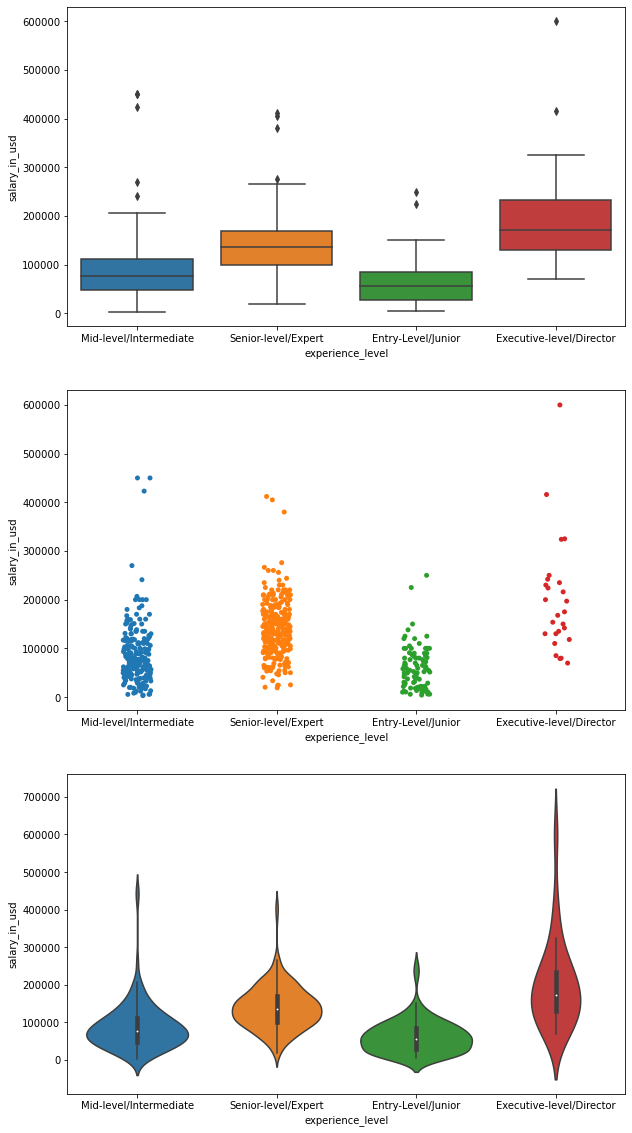

In [132]:
#  vissualizations showing experience level  distribution


fig,axes =plt.subplots(3,figsize=(10,20))
sns.boxplot(ax = axes[0],x = 'experience_level', y = 'salary_in_usd', data = data)
sns.stripplot(ax = axes[1],x = 'experience_level', y = 'salary_in_usd', data = data)
sns.violinplot(ax = axes[2],x = 'experience_level', y = 'salary_in_usd', data = data)
plt.show()

### The average salary is higher for a higher experience level. Executive-level/Directors are paid the highest salaries of all the experience levels on average, followed by the Senior or expert level, and Entry-level are the least earners.

# Salary by company size analysis

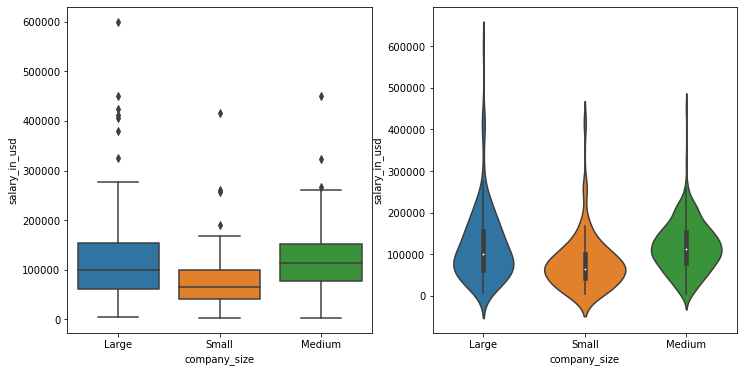

In [53]:
#  vissualizations showing salary in usd by company size analysis


fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(ax=axes[0], x = 'company_size', y = 'salary_in_usd', data = data)
sns.violinplot(ax=axes[1], x = 'company_size', y = 'salary_in_usd', data = data)
plt.show()

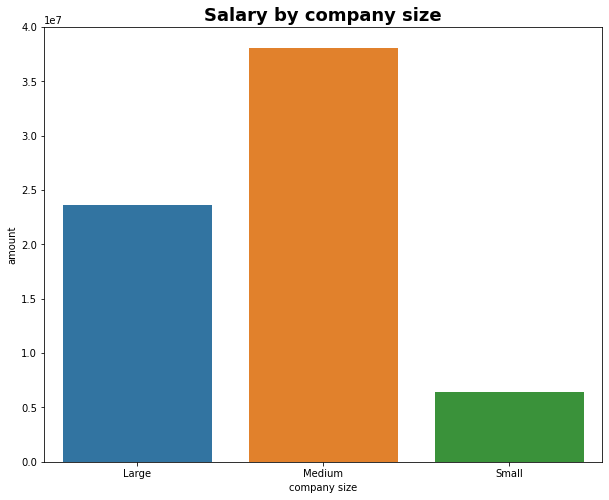

In [18]:
# A vissualiztion showing salary by company size
salary_in_usd_company_size = data.groupby('company_size').sum()['salary_in_usd'].reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data = salary_in_usd_company_size, x = 'company_size', y = 'salary_in_usd')
plt.xlabel('company size')
plt.ylabel('amount')
plt.title('Salary by company size', fontsize=18, fontweight='bold')
plt.show()

### The Medium size company seems to be paying their employees the highest salaries both in figures and also on average followed by the large size company, and the small size company is the least in terms of salary payment. this is due to the fact that they have the highest number of employees across all experience levels.

# Highest salary by job title analysis


In [101]:
# a pivot table showing job title and their salaries in usd

high_job_sal_pivot = pd.pivot_table(data=data,index=['job_title'],values=['salary_in_usd']
                                    ,aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
high_job_sal_pivot

,salary_in_usd
job_title,
Principal Data Engineer,600000
Financial Data Analyst,450000
Research Scientist,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000
Applied Data Scientist,380000
Director of Data Science,325000


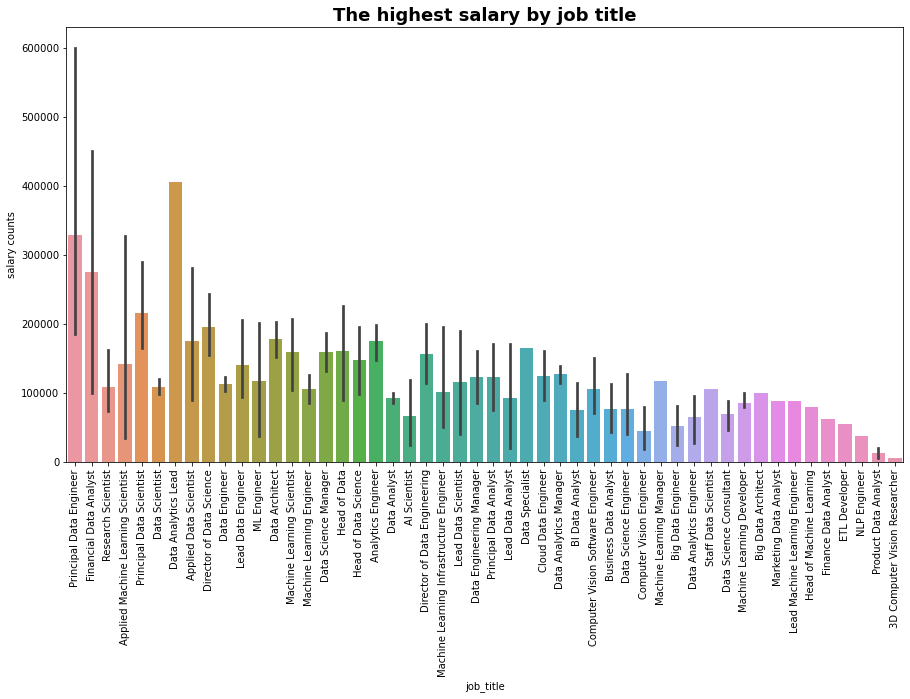

In [151]:
#  vissualization showing salaries in usd by job title  distribution

plt.figure(figsize=(15,8))
sns.barplot(x = 'job_title', y = 'salary_in_usd', data = data, 
            order=data.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False).index)
plt.title('The highest salary by job title', fontsize=18,fontweight='bold')
plt.xlabel('job_title')
plt.xticks(rotation= 90)
plt.ylabel('salary counts')
plt.show()

Text(0.5, 1.0, 'Top ten highest salaries by job title')

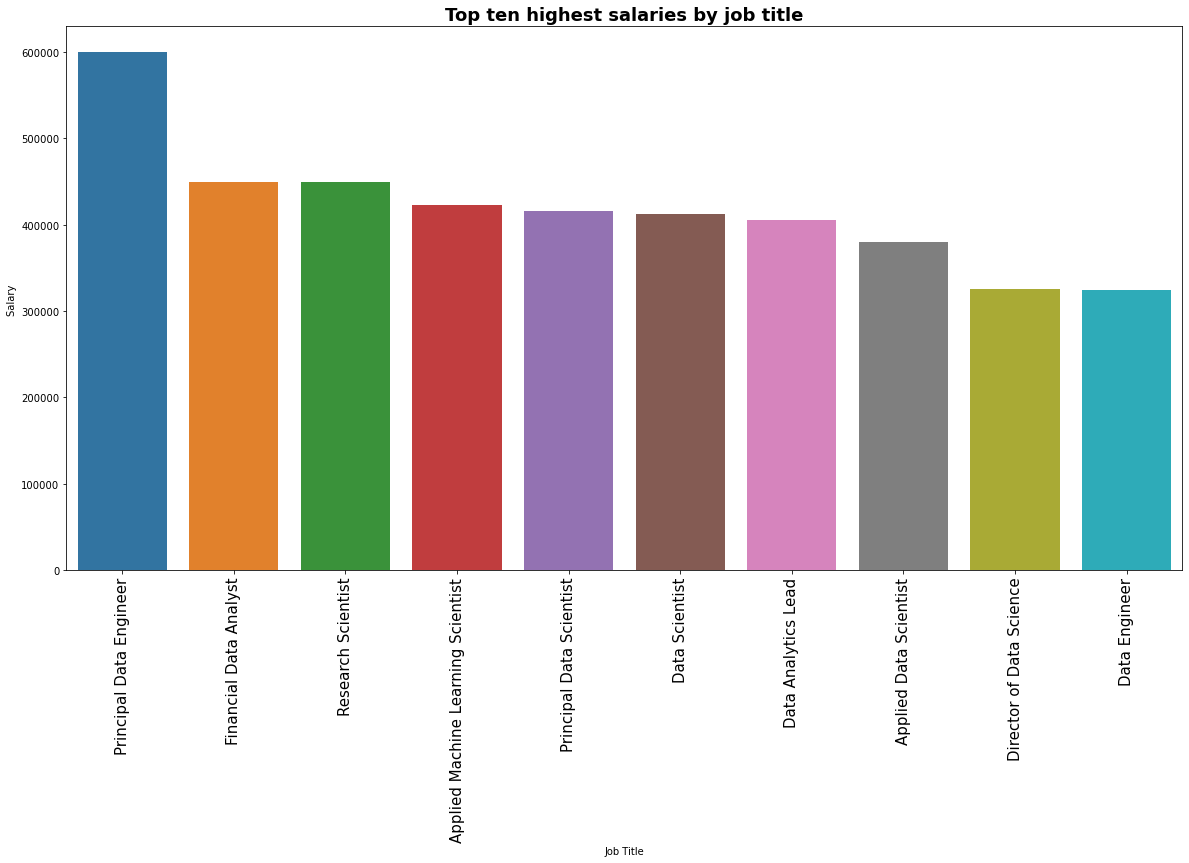

In [152]:
# A vissualization showing top ten Highest salaries by job title 

highest_sal = data.groupby('job_title').max()['salary_in_usd']
highest_sal = highest_sal.sort_values(ascending=False).reset_index().head(10)


plt.figure(figsize=(20,10))
sns.barplot(x='job_title', y='salary_in_usd', data=highest_sal)
plt.xticks(rotation=90,fontsize=15)  # rotate x-axis labels for better visibility
plt.xlabel('Job Title')
plt.ylabel('Salary ')
plt.title('Top ten highest salaries by job title',fontsize=18, fontweight='bold')


Text(0.5, 1.0, 'Bottom five of least salaries by job title')

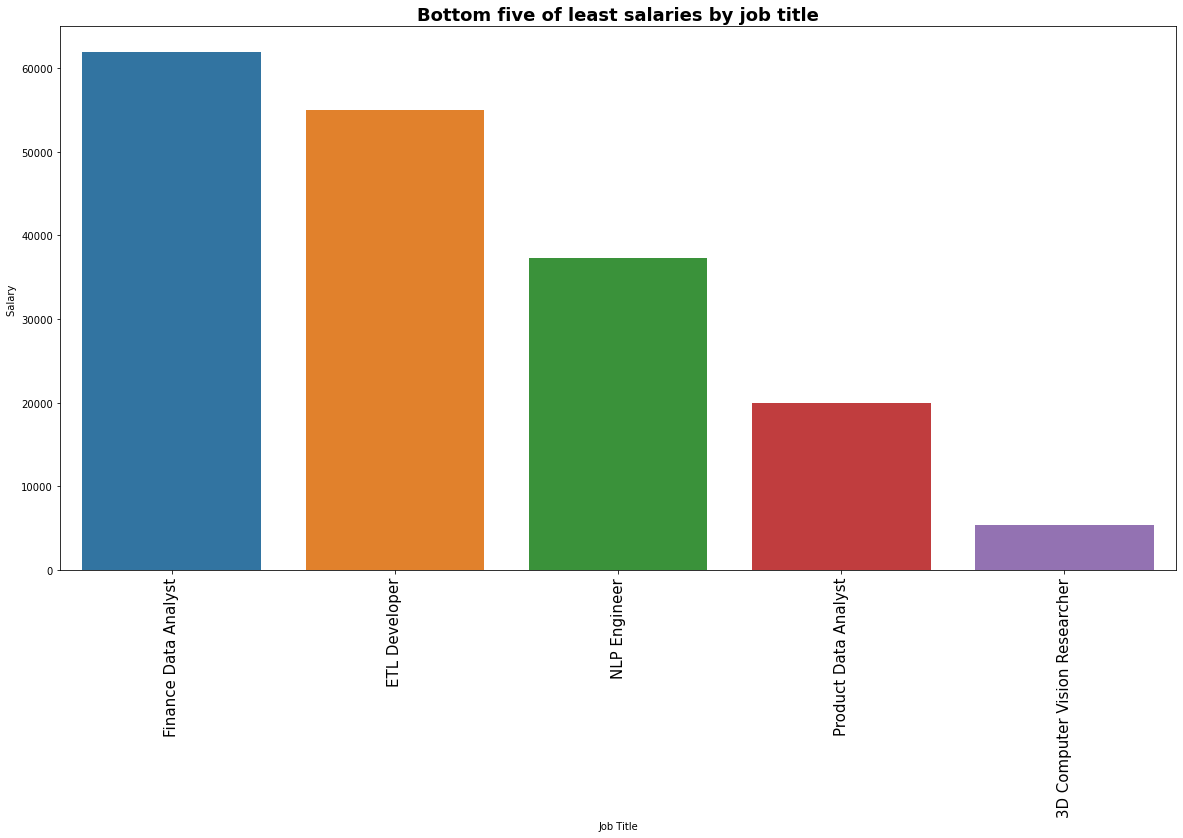

In [153]:
# A vissualization showing five least salaries in usd by job title

highest_sal = data.groupby('job_title').max()['salary_in_usd']
highest_sal = highest_sal.sort_values(ascending=False).reset_index().tail(5)


plt.figure(figsize=(20,10))
sns.barplot(x='job_title', y='salary_in_usd', data=highest_sal)
plt.xticks(rotation=90,fontsize=15)  # rotate x-axis labels for better visibility
plt.xlabel('Job Title')
plt.ylabel('Salary ')
plt.title('Bottom five of least salaries by job title', fontsize=18, fontweight='bold')

### The ten top job titles that earns the highest salaries with their figures are: 
#### principal Data Engineer	= 600000
#### Financial Data Analyst	= 450000
#### Research Scientist	= 450000
#### Applied Machine Learning Scientist	= 423000
#### Principal Data Scientist	= 416000
#### Data Scientist	= 412000
#### Data Analytics Lead	= 405000
#### Applied Data Scientist	= 380000
#### Director of Data Science	= 325000
#### Data Engineer	= 324000

### While the least five earners in terms of salaries by job titles are:

#### Finance Data Analyst	= 61896
#### ETL Developer = 54957
#### NLP Engineer	= 37236
#### Product Data Analyst	= 20000
#### 3D Computer Vision Researcher	= 5409



# Average salary by company location

In [141]:
# a pivot table showing the distribution of average salaries by company locations

avg_sal_pivot = pd.pivot_table(data=data,index=['company_location'],values=['salary_in_usd'],
                               aggfunc = 'mean').sort_values(by=('salary_in_usd'),ascending=False)
display(avg_sal_pivot)

,salary_in_usd
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667
AE,100000.000000
DZ,100000.000000
IQ,100000.000000


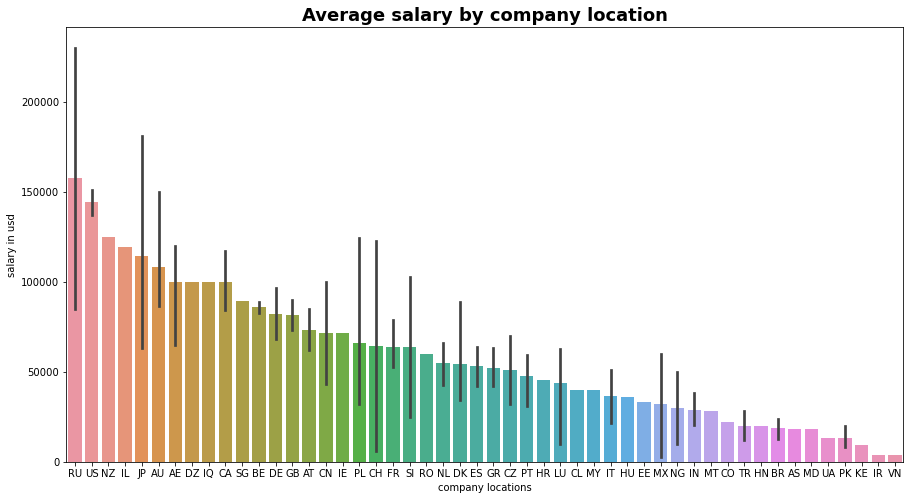

In [148]:
#  vissualization showing average salaries by company location

plt.figure(figsize=(15,8))
sns.barplot(x = 'company_location',y = 'salary_in_usd', data = data, 
            order = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).index)
plt.ylabel('salary in usd')
plt.xlabel('company locations')
plt.title('Average salary by company location', fontsize=18,fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Average Salary of top ten companies by Location')

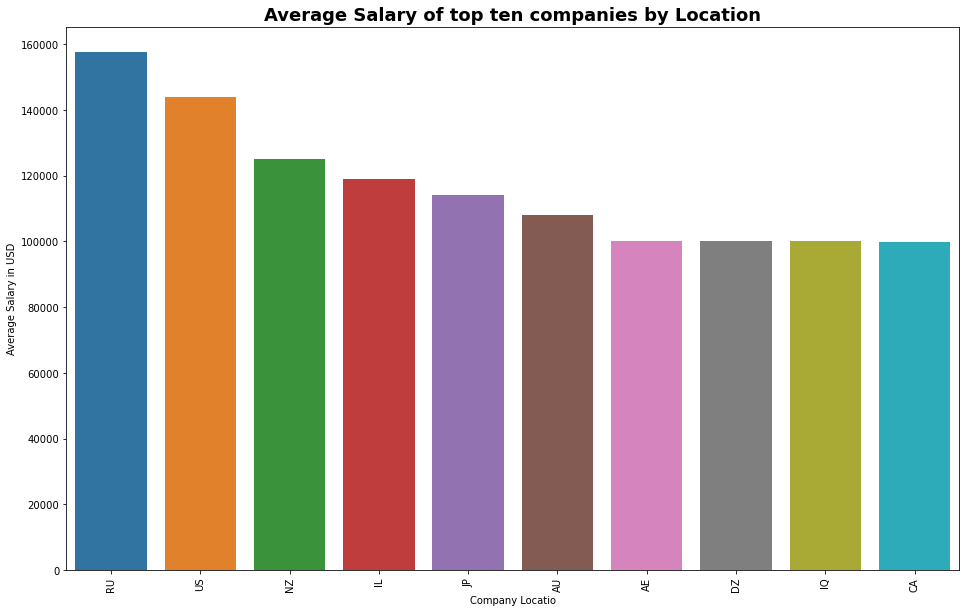

In [150]:
# top ten average salary by company location

avg_sal = data.groupby(['company_location']).mean()['salary_in_usd']
avg_sal = avg_sal.sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(16,10))
sns.barplot(x='company_location', y='salary_in_usd', data=avg_sal)
plt.xticks(rotation=90)  # rotate x-axis labels for better visibility
plt.xlabel('Company Locatio')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary of top ten companies by Location', fontsize=18, fontweight='bold')

### The top ten companies  with the highest average salaries are;

#### RU	157500.000000
#### US	144055.261972
#### NZ	125000.000000
#### IL	119059.000000
#### JP	114127.333333
#### AU	108042.666667
#### AE	100000.000000
#### DZ	100000.000000
#### IQ	100000.000000
#### CA	99823.733333


# Summary of  Findings and Recomendations;


 From The dataset above, it is understood that the Job and  Salaries covers a period of 3 years, from 2020 to 2022. Mojority of the data professionals are resident of US and with a majority of Senior-level and Mid-level experience. The most common Job Titles are Data Scientists, Data Engineers, and Data Analysts. Many of the data professionals in the dataset are Full-time employees and work for medium and small companies as well.

The dataset shows a steady increase in the number of tech. professionals, from 72 in 2020 to 217 in 2021, and 318 in 2022. The highest salary earned during the period was USD600,000 , while the lowest was USD2,859, and the average salary was USD112,298. A significant majority of (63%) of the tech. professionals worked fully remote, while 16% worked partially remote, and the rest worked as non remote professional.

The analysis of the data by experience level shows that the top 3 job titles across all experience levels are Data Scientists, Data Engineers and Data Analysts respectively. Most data professionals work with Medium-sized companies, and most of them are Senior-level and Mid-level professionals.

The total salaries earned by data professionals  also rises  from USD6.8 million in 2020 to USD39.6 million in 2022. Cumulatively, Senior-level professionals earned USD38.8 million, and Mid-level professionals earned USD18.7 million during the 3-year period. The analysis of salary by job title shows that Principal Data Engineers had the highest average salary, followed by Financial Data Analysts, Research Scientists, and Applied Machine Learning Scientists.

# Recommendations;

In conclusion, the dataset provides a comprehensive analysis of the data science profession and the growth in the industry as well. The increases in salaries  and the shift to remote working indicate the flexibility of the data science pfrofession and the lucreativeness of the field. In essence more people are encouraged to pick-up fields/roles in the tech. industries because of its high demands, lucrativeness, flexibility and its importance for descision making and business growth.

